# ２変数の正規分布をプロット

①２変数の正規分布を乱数で生成してプロット  
②①を標準化してプロット→パラメーターとサンプルの平均・分散どちらでも  
③①無相関化してプロット  
上記を色々な平均分散で試す  

## 実装の方針

1. データの生成  
    平均ベクトル  
    共分散行列  
    個数  
    
    
2. 標準化　　
    
    
    
3. 無相関化  
    共分散行列の固有値  
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
class CovarianceMatrix(pd.DataFrame):
    """
    共分散行列です。
    生成する際に自動で固有値・固有ベクトルを計算します。
    """
    
    @property
    def unique_val(self):
        """
        固有値のプロパティです。
        """
        return pd.DataFrame(self._cal_unique()[0])
    
    @property
    def unique_vec(self):
        """
        固有ベクトルのプロパティです。
        """
        return pd.DataFrame(self._cal_unique()[1])
    
    def _cal_unique(self):
        """
        固有値・固有ベクトルを計算します。
        
        """
        return np.linalg.eig(self.values)
    
    @staticmethod
    def compose(vec_var, vec_cov):
        """
        与えられた分散ベクトル・共分散ベクトルから、共分散行列を生成します。
        """
        return CovarianceMatrix([[vec_var[0]**2, vec_cov[0]], [vec_cov[0], vec_var[1] ** 2]])

    @staticmethod
    def genarate(nd_array: np.array):
        """
        与えられたデータから、共分散行列を生成します。
        """
        return CovarianceMatrix(np.cov(nd_array, rowvar=False))


# test
cov = CovarianceMatrix([[1, 2], [2, 1]])
display(cov)
display(cov.unique_val)
display(cov.unique_vec)

,0,1
0,1,2
1,2,1


,0
0,3.0
1,-1.0


,0,1
0,0.707107,-0.707107
1,0.707107,0.707107


,0,1
0,-0.658602,0.341398
1,1.966322,2.966322
2,-2.147326,-1.147326
3,-1.352804,-0.352804
4,0.374586,1.374586


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


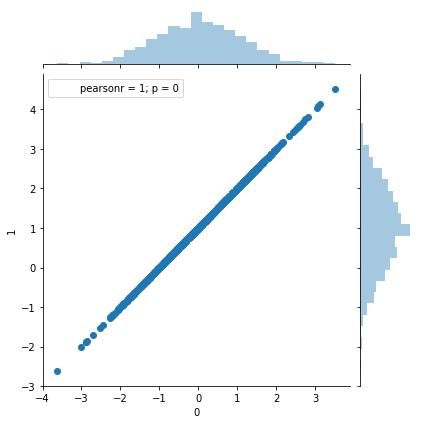

In [3]:
class Nomal(pd.DataFrame):
    """
    正規分布です。
    """
    @staticmethod
    def create(vec_m, mat_cov, num):
        """
        平均ベクトルと共分散行列を指定して正規分布を生成します。

        :param vec_m 平均ベクトル
        :param mat_cov 共分散行列
        :param num データの個数
        """
        return Nomal(np.random.multivariate_normal(vec_m, mat_cov, num))
    
    @property
    def mean(self):
        return self.values.mean(axis=0)
    
    @property
    def var(self):
        return self.values.var(axis=0)

def create_nomal(vec_m, mat_cov, num):
    """
    与えられたパラメータから２次元正規分布を生成します
    """
    
    def genarate_nomal(vec_m, S, n) -> pd.DataFrame:
        """
        平均ベクトルと共分散行列を指定して正規分布を生成します。

        :param vec_m 平均ベクトル
        :param S 共分散行列
        :param n データの個数
        """
        nd_y = np.random.multivariate_normal(vec_m, S, n)
        df_y = pd.DataFrame(data=nd_y)
        return df_y
    
    #TODO パラメータチェック
    df_nomal = genarate_nomal(vec_m, mat_cov, num)
    return df_nomal


# test
vec_m = [0, 1]
vec_var = [1, 1]
vec_cov = [1]
num = 1000
df_cov = CovarianceMatrix.compose(vec_var, vec_cov)
# nomal = create_nomal(vec_m, df_cov, num)
nomal = Nomal.create(vec_m, df_cov, num)
display(nomal.head())

sns.jointplot(nomal.loc[:,0], nomal.loc[:,1])
plt.show()

/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


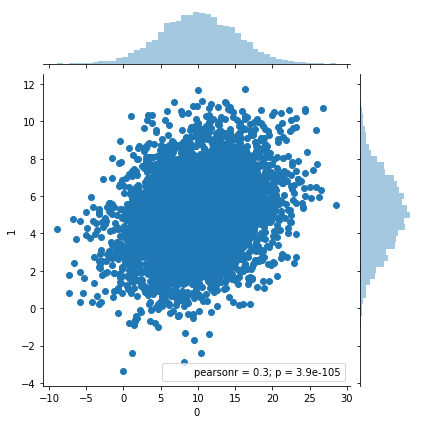

/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


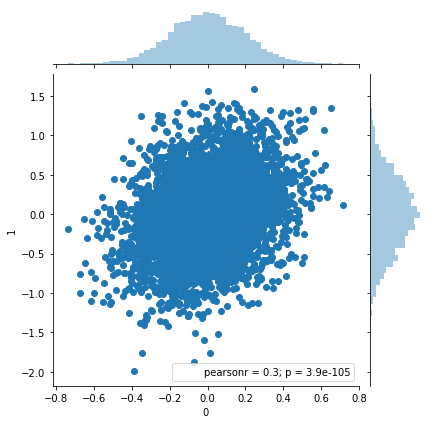

In [4]:
def standardize(df_input: pd.DataFrame, nd_mean = None, nd_var = None):
    """
    分布を標準化します。
    """
    if nd_mean is None:
        nd_mean = np.mean(df_input.values, axis=0)
    if nd_var is None:
        nd_var = np.var(df_input.values, axis=0)
#     print(f"nd_mean : {nd_mean}")
#     print(f"nd_var: {nd_var}")
    nd_standard = (df_input.values - nd_mean) / nd_var
    return pd.DataFrame(nd_standard)


# test
vec_m = [10, 5]
vec_var = [5, 2]
vec_cov = [3]
num = 5000
mat_cov = CovarianceMatrix.compose(vec_var, vec_cov)
nomal = create_nomal(vec_m, mat_cov, num)
standardization = standardize(nomal)

sns.jointplot(nomal.loc[:,0], nomal.loc[:,1])
plt.show()
sns.jointplot(standardization.loc[:,0], standardization.loc[:,1])
plt.show()

decorrelation:(100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


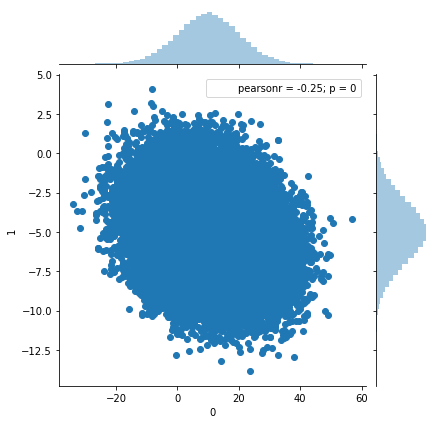

/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


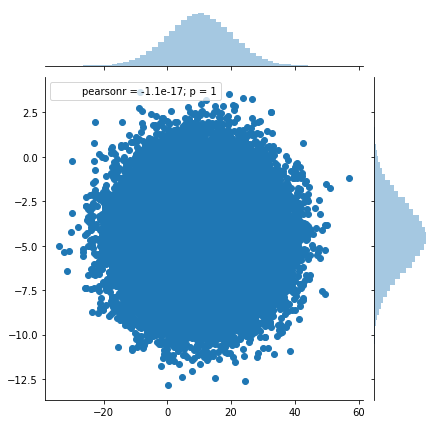

In [5]:
def decorrelate(df_input: pd.DataFrame):
    """
    分布を無相関化します。
    """
    mat_cav = CovarianceMatrix.genarate(df_input)
#     print(f"mat_cav:{mat_cav.shape}")
#     print(f"df_input:{df_input.shape}")
    return mat_cav.unique_vec.T.values.dot(df_input.T.values).T

# test
vec_m = [10, -5]
vec_var = [10, 2]
vec_cov = [-5]
num = 100000
mat_cov = CovarianceMatrix.compose(vec_var, vec_cov)
nomal = Nomal.create(vec_m, mat_cov, num)
decorrelation = decorrelate(nomal)

print(f"decorrelation:{decorrelation.shape}")
sns.jointplot(nomal.loc[:, 0], nomal.loc[:, 1])
plt.show()
sns.jointplot(decorrelation[:, 0], decorrelation[:, 1])
plt.show()

試すパラメータについて  
平均 : 0 , 正, 負  
分散 : 大, 小  

standard_with_data: (100000, 2)
standard_with_param: (100000, 2)
decorrelation :(100000, 2)
white: (100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_ax

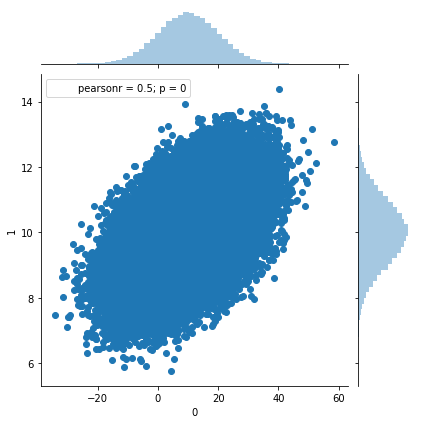

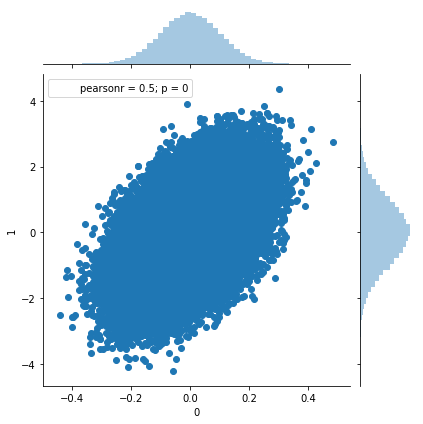

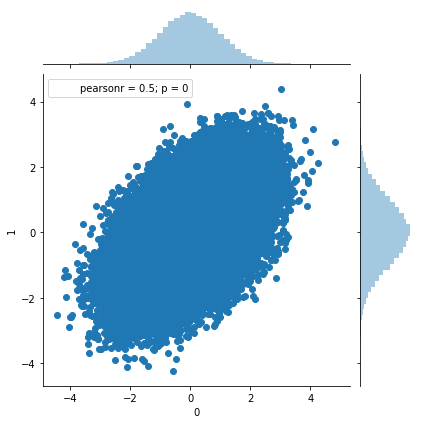

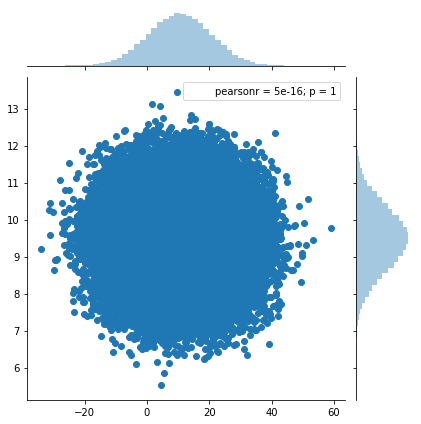

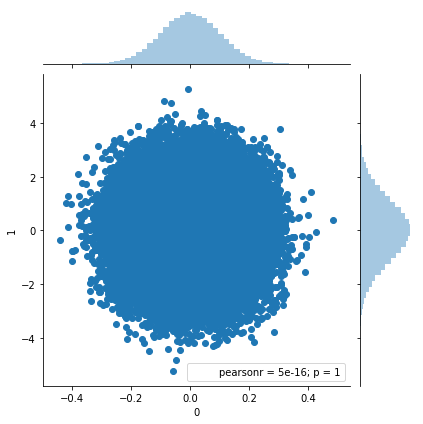

In [8]:
class Task():
    
    def __init__(self, vec_mean, vec_var, vec_cov, num):
        self.vec_mean = vec_mean
        self.vec_var = vec_var
        self.vec_cov = vec_cov
        self.cov_mat = CovarianceMatrix.compose(vec_var, vec_cov)
        self.num = num
        
    def run(self):
        # doing
        nomal = Nomal.create(self.vec_mean, self.cov_mat, num)
        standard_with_data = standardize(nomal)
        standard_with_param = standardize(nomal, nd_mean=self.vec_mean, nd_var=self.vec_var)
        decorrelation = decorrelate(nomal)
        white = standardize(Nomal(decorrelation))
        print(f"standard_with_data: {standard_with_data.shape}")
        print(f"standard_with_param: {standard_with_param.shape}")
        print(f"decorrelation :{decorrelation.shape}")
        print(f"white: {white.shape}")
        #plot
        sns.jointplot(nomal.loc[:,0], nomal.loc[:,1])
        sns.jointplot(standard_with_data.loc[:,0], standard_with_data.loc[:,1])
        sns.jointplot(standard_with_param.loc[:,0], standard_with_param.loc[:,1])
        sns.jointplot(decorrelation[:, 0], decorrelation[:, 1])
        sns.jointplot(white.loc[:, 0], white.loc[:, 1])
        plt.show()
        
        
# test
num = 100000
vec_mean = [10, 10]
vec_var = [10, 1]
vec_cov = [5]
Task(vec_mean=vec_mean , vec_var=vec_var, vec_cov=vec_cov, num=num).run() 

standard_with_data: (100000, 2)
standard_with_param: (100000, 2)
decorrelation :(100000, 2)
white: (100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_ax

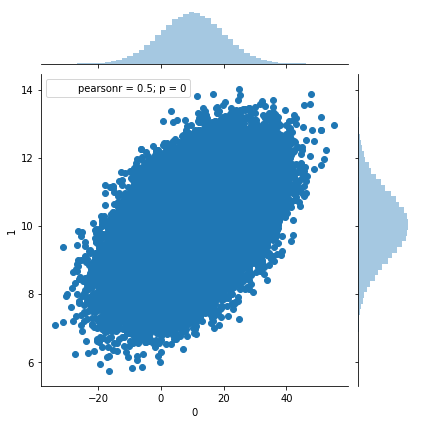

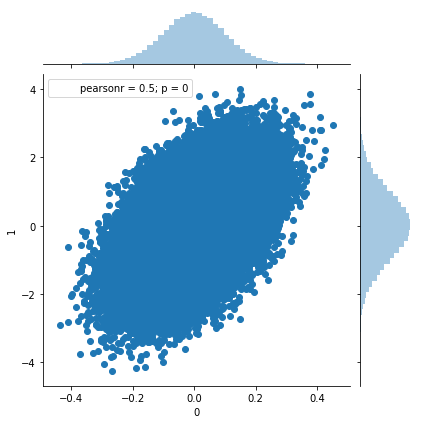

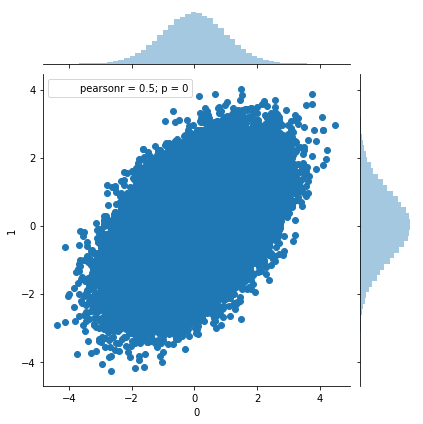

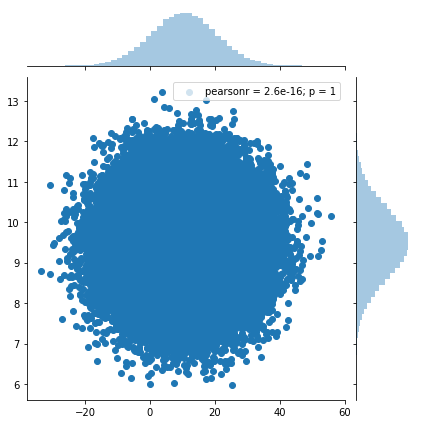

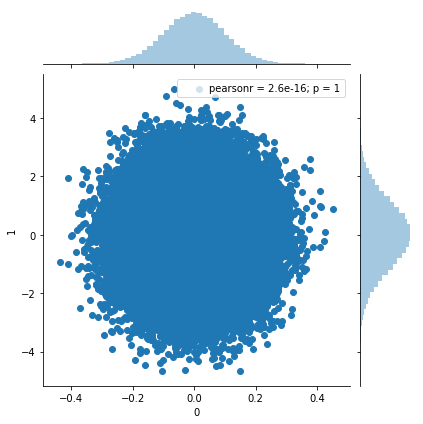

standard_with_data: (100000, 2)
standard_with_param: (100000, 2)
decorrelation :(100000, 2)
white: (100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/y

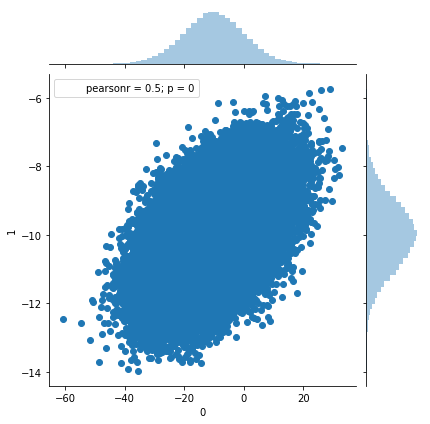

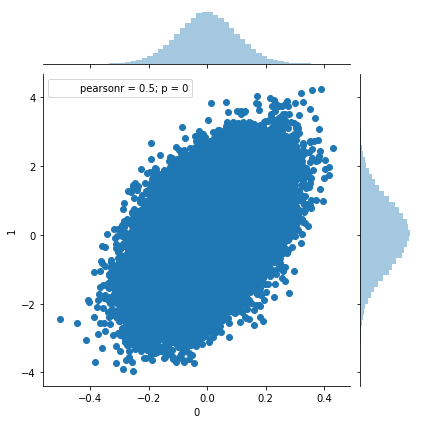

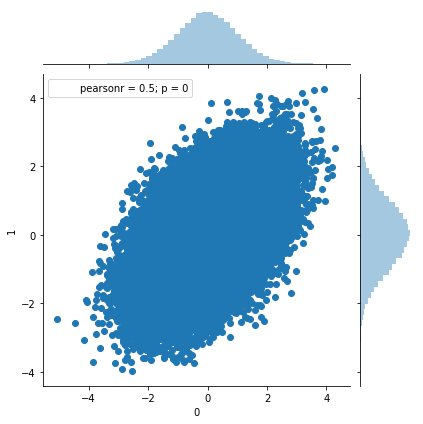

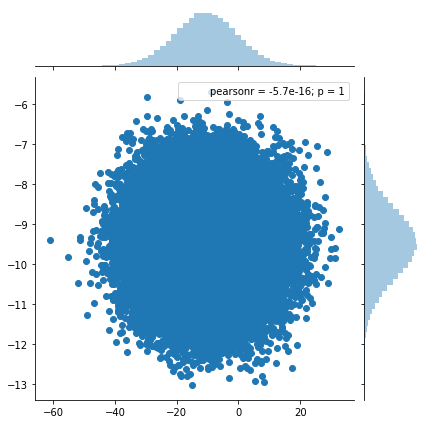

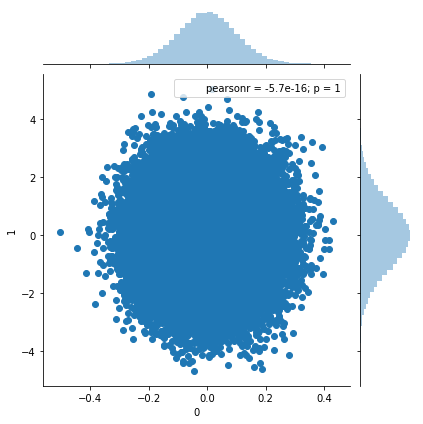

standard_with_data: (100000, 2)
standard_with_param: (100000, 2)
decorrelation :(100000, 2)
white: (100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/y

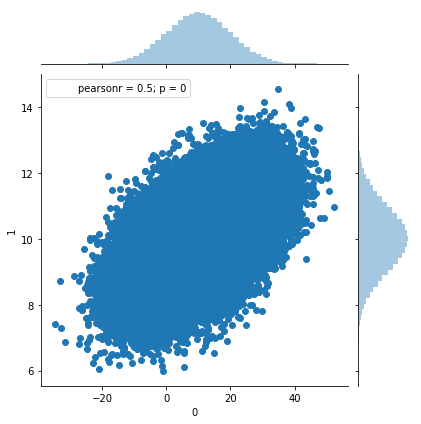

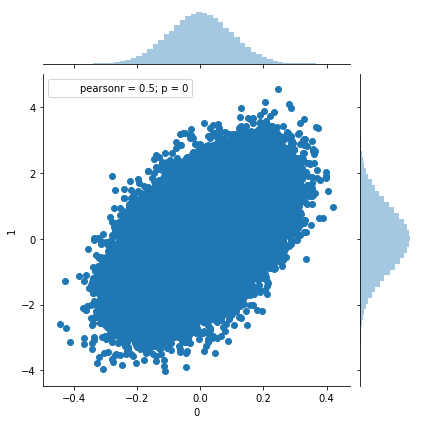

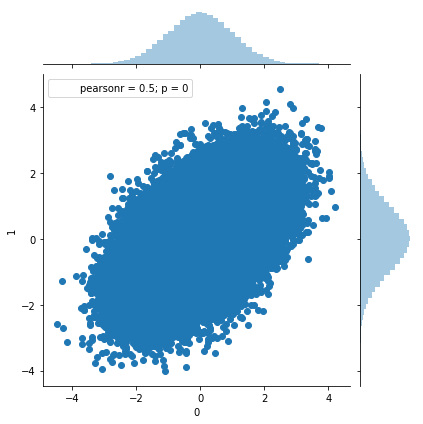

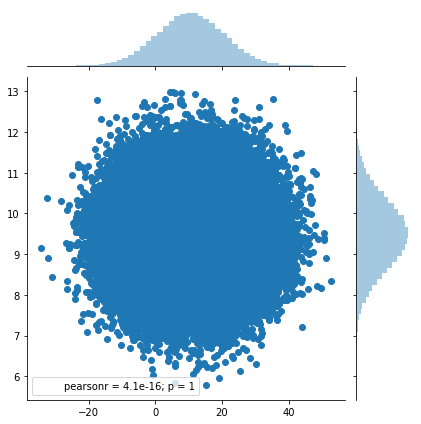

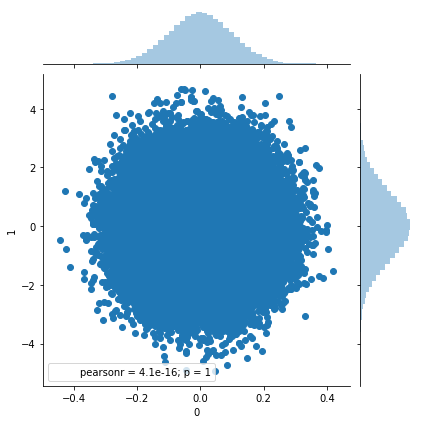

standard_with_data: (100000, 2)
standard_with_param: (100000, 2)
decorrelation :(100000, 2)
white: (100000, 2)


/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yohei.moriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/y

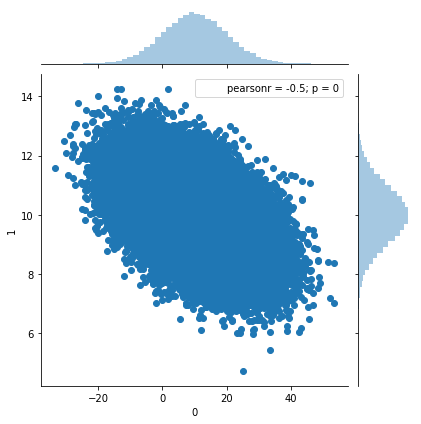

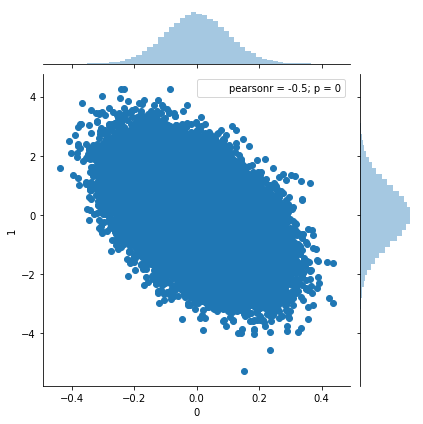

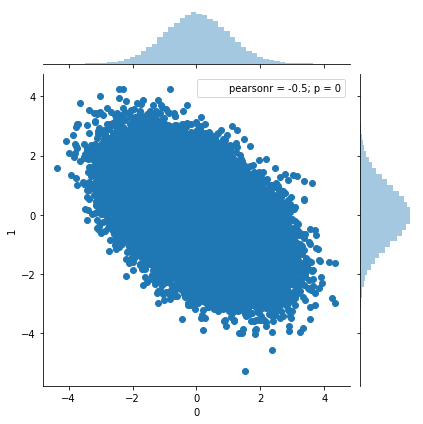

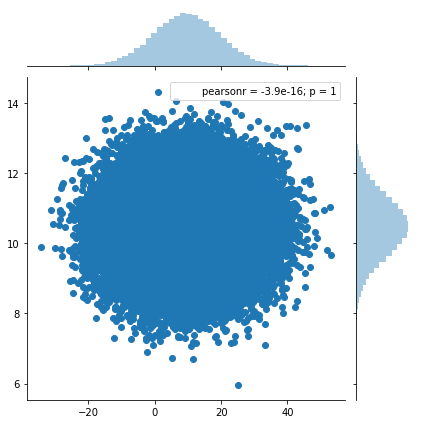

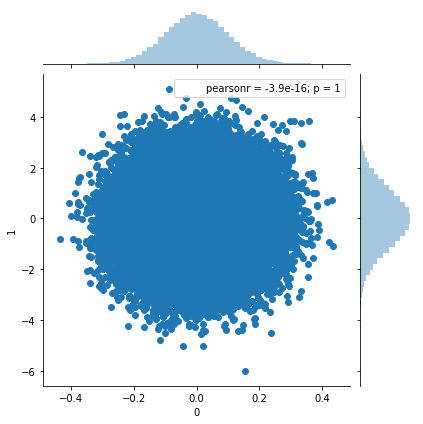

In [9]:
def main():
    tasks = [
        Task(vec_mean=[10, 10] , vec_var=[10, 1], vec_cov=[5], num=num), 
        Task(vec_mean=[-10, -10] , vec_var=[10, 1], vec_cov=[5], num=num), 
        Task(vec_mean=[10, 10] , vec_var=[10, 1], vec_cov=[5], num=num), 
        Task(vec_mean=[10, 10] , vec_var=[10, 1], vec_cov=[-5], num=num)
    ]
    
    for task in tasks:
        task.run()

main()